# Next day rain prediction using XGBoostClassifier





![](https://content.api.news/v3/images/bin/075f3a361871a5179268fb630292e4b4)

## Problem statement 

>The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations.As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [3]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
28004,2011-05-18,Richmond,2.1,19.7,0.0,3.2,NaN,NE,20.0,NNW,...,99.0,46.0,1033.7,1029.7,NaN,NaN,6.3,19.6,No,No
71567,2012-04-19,Mildura,11.0,26.7,0.0,4.2,10.5,S,24.0,SE,...,68.0,42.0,1017.0,1013.3,2.0,3.0,18.9,26.4,No,No
70840,2010-03-24,Mildura,11.7,29.5,0.0,6.2,11.2,SE,26.0,S,...,67.0,31.0,1024.5,1021.6,0.0,1.0,15.1,27.5,No,No
100886,2012-10-04,MountGambier,11.9,22.4,0.0,6.8,9.9,WNW,50.0,NNW,...,47.0,66.0,1011.8,1012.8,0.0,4.0,19.5,16.7,No,No
131468,2013-03-16,Hobart,13.1,17.0,0.0,6.0,3.1,SSW,56.0,W,...,67.0,84.0,1012.9,1012.4,NaN,NaN,15.1,12.0,No,Yes
79199,2012-05-25,Watsonia,8.7,11.3,5.2,1.4,0.0,WSW,63.0,NNW,...,99.0,100.0,1007.7,1004.8,8.0,8.0,8.9,9.8,Yes,Yes
77665,2016-08-06,Portland,6.4,14.1,0.0,NaN,NaN,E,17.0,N,...,82.0,64.0,1028.4,1025.1,7.0,8.0,7.9,13.5,No,No
5864,2016-12-23,BadgerysCreek,18.5,28.6,0.0,NaN,NaN,E,30.0,N,...,64.0,55.0,1019.1,1015.4,NaN,NaN,22.8,26.1,No,No
96940,2010-03-13,Adelaide,20.2,31.8,0.0,NaN,9.4,E,39.0,ENE,...,35.0,25.0,1029.3,1025.7,NaN,NaN,23.9,29.4,No,No
138957,2017-01-23,AliceSprings,22.8,32.9,26.2,NaN,NaN,ESE,48.0,WNW,...,79.0,58.0,1008.4,1004.4,8.0,8.0,25.9,30.9,Yes,No


The dataset contains over 1,45,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`.

### Let's check the data types and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, lets discard the missing values of  `RainTomorrow` or `RainToday` since one of them is the target variable, and the other is likely to be very closely related to the target variable. 

In [5]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

### Exploratory Data Analysis and Visualization

Before training a machine learning model, let's explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Matplotlib and Seaborn libraries. 

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


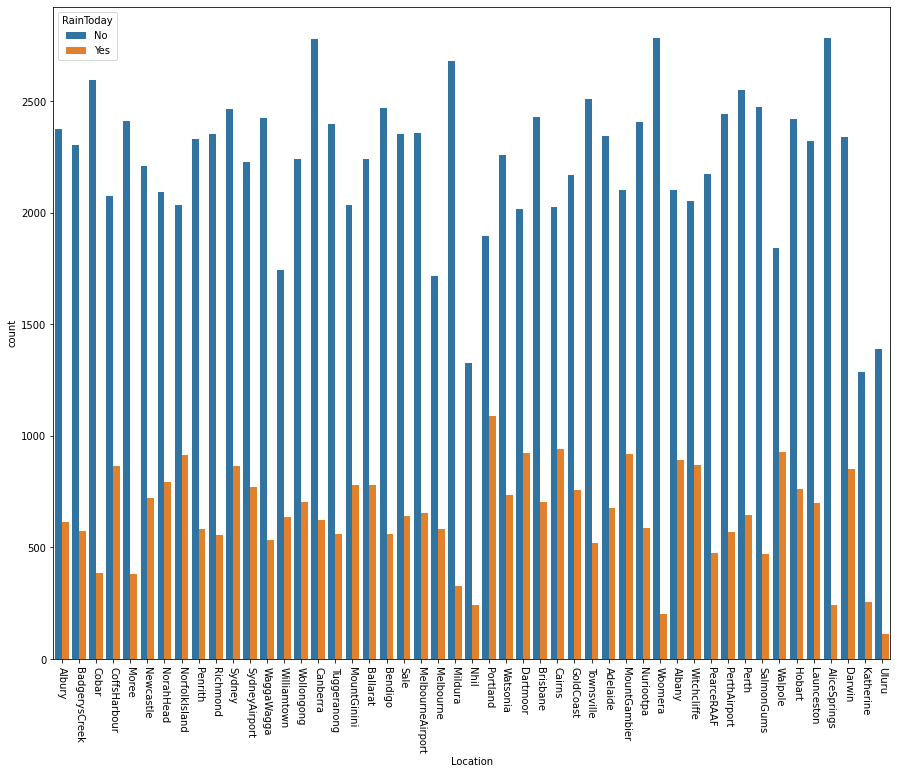

In [8]:
%matplotlib inline
plt.figure(figsize=(15,12))
plt.xticks(rotation=270)
sns.countplot(data=df,x='Location',hue='RainToday')

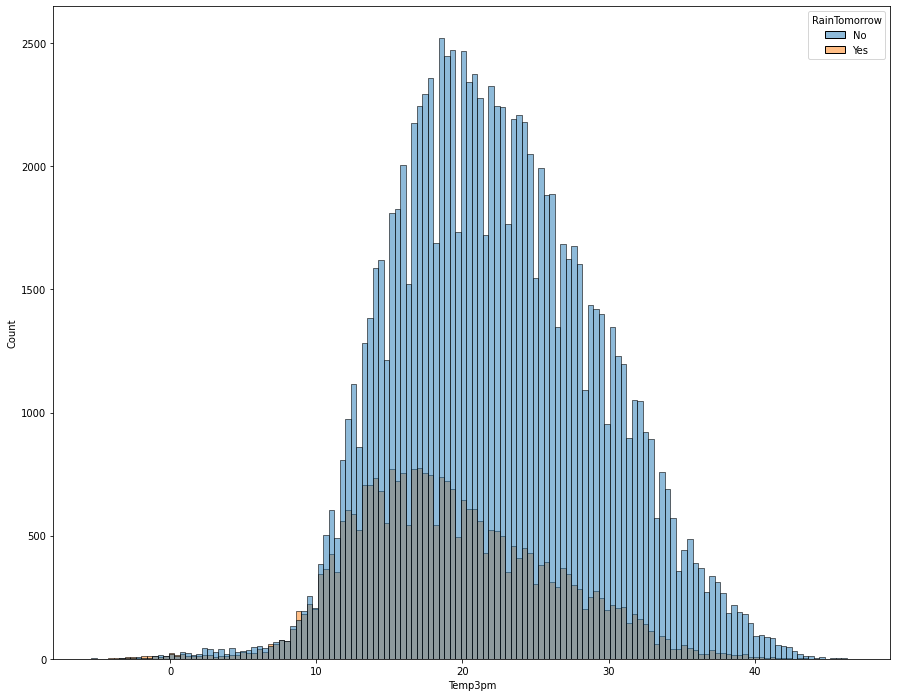

In [9]:
plt.figure(figsize=(15,12))
sns.histplot(data=df, 
             x='Temp3pm',
             hue='RainTomorrow')

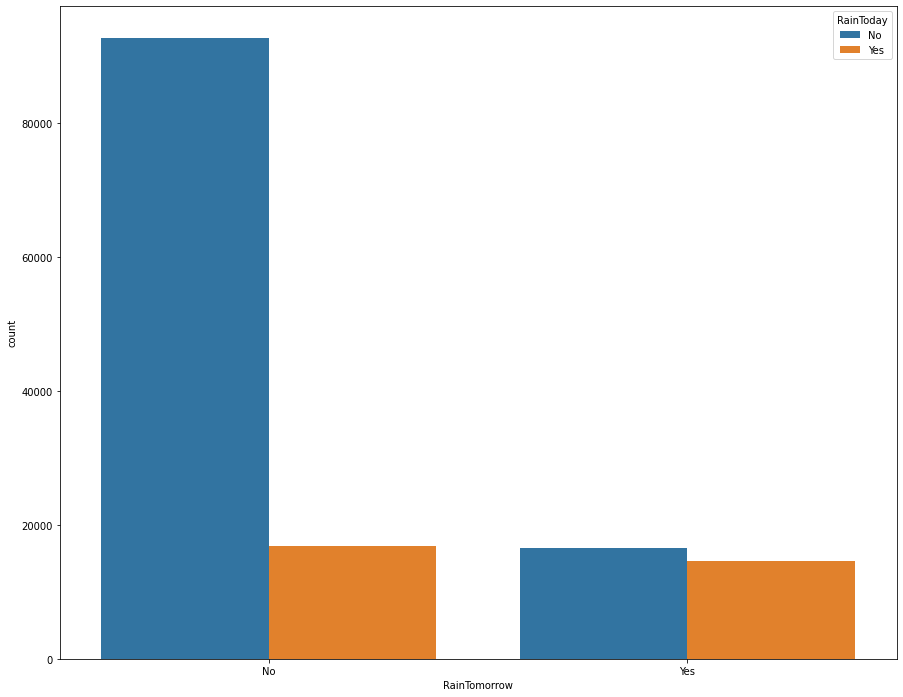

In [10]:
plt.figure(figsize=(15,12))
sns.countplot(data=df, 
             x='RainTomorrow',
             hue='RainToday')

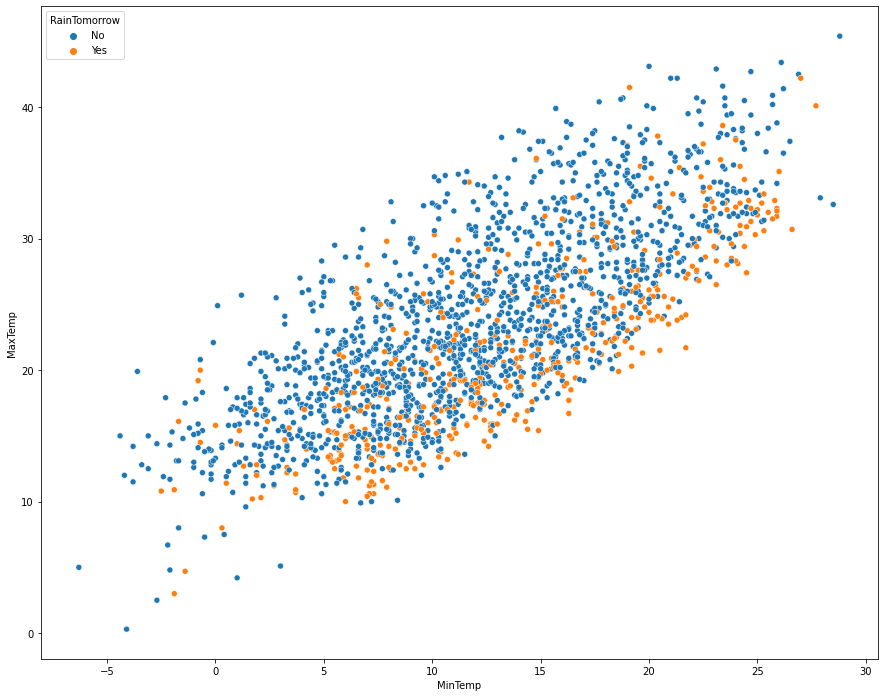

In [11]:
plt.figure(figsize=(15,12))
sns.scatterplot(data=df.sample(2000), x='MinTemp', y='MaxTemp', 
         hue='RainTomorrow')

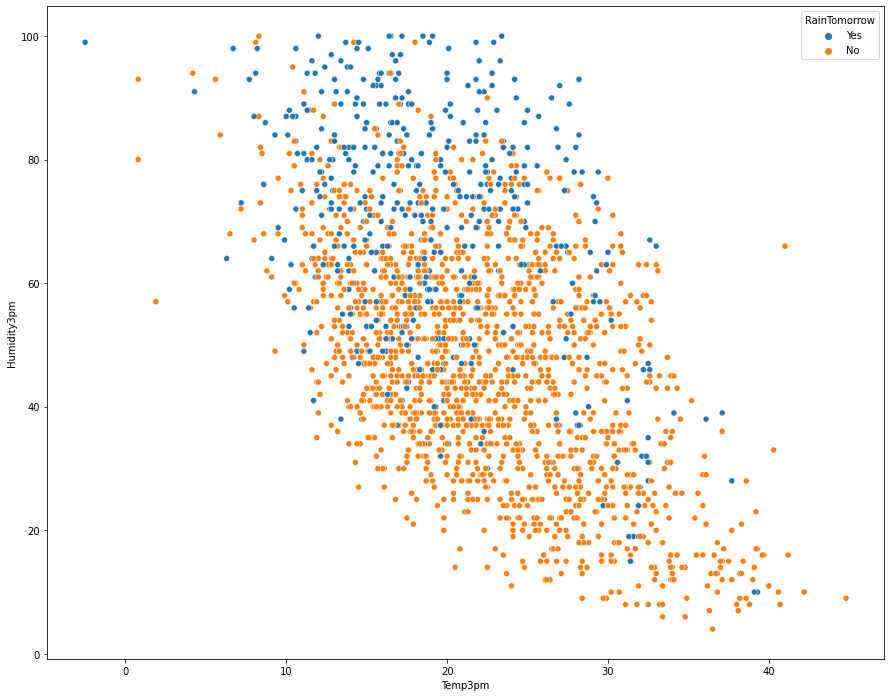

In [12]:
plt.figure(figsize=(15,12))
sns.scatterplot(data=df.sample(2000), x='Temp3pm',
           y='Humidity3pm',
           hue='RainTomorrow')

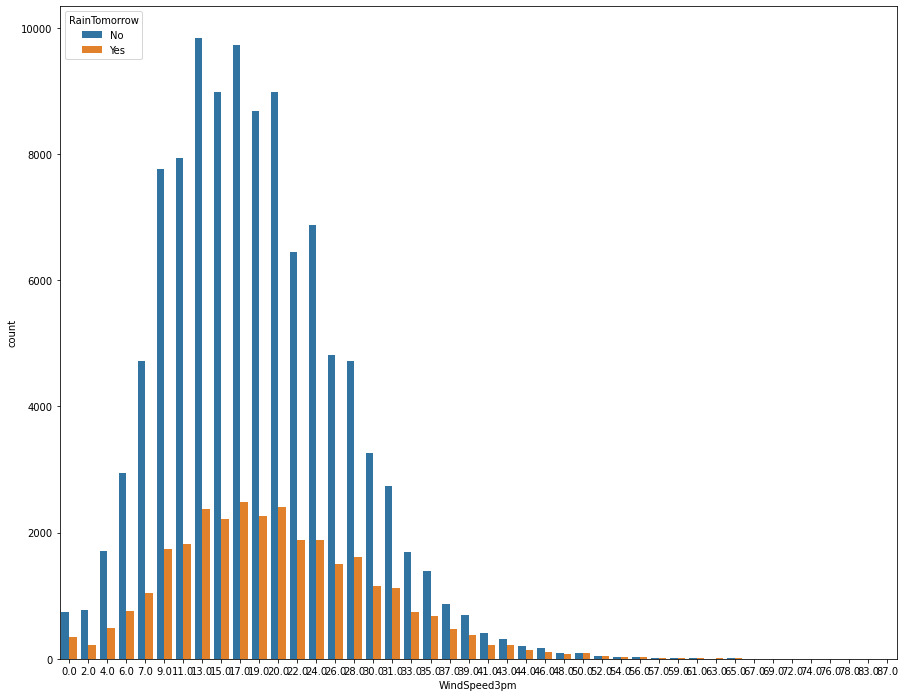

In [13]:
plt.figure(figsize=(15,12))
sns.countplot(data=df, 
             x='WindSpeed3pm',
             hue='RainTomorrow')

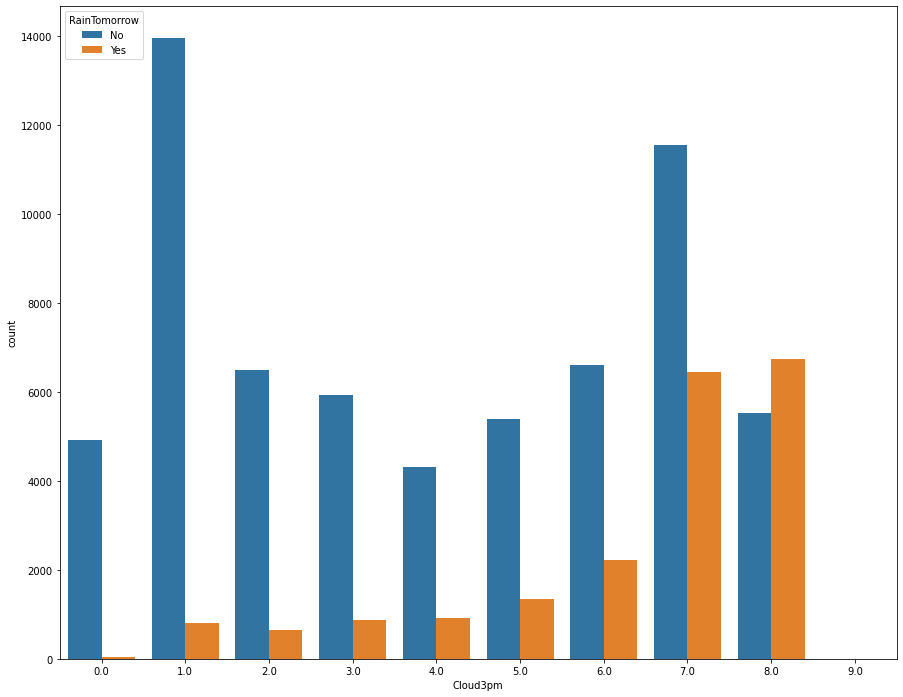

In [14]:
plt.figure(figsize=(15,12))
sns.countplot(data=df, 
             x='Cloud3pm',
             hue='RainTomorrow')

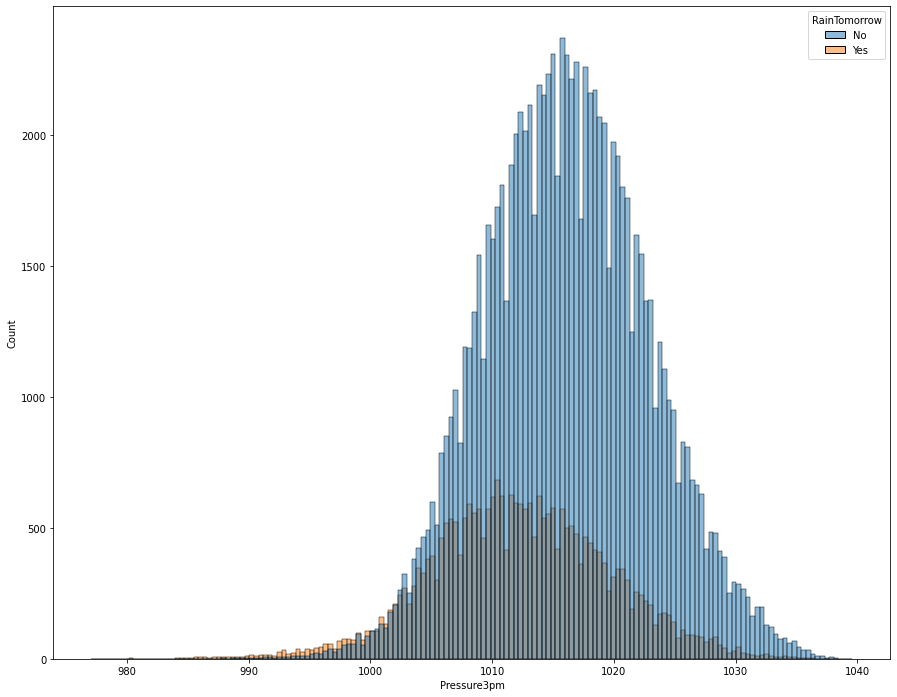

In [15]:
plt.figure(figsize=(15,12))
sns.histplot(data=df, 
             x='Pressure3pm',
             hue='RainTomorrow')

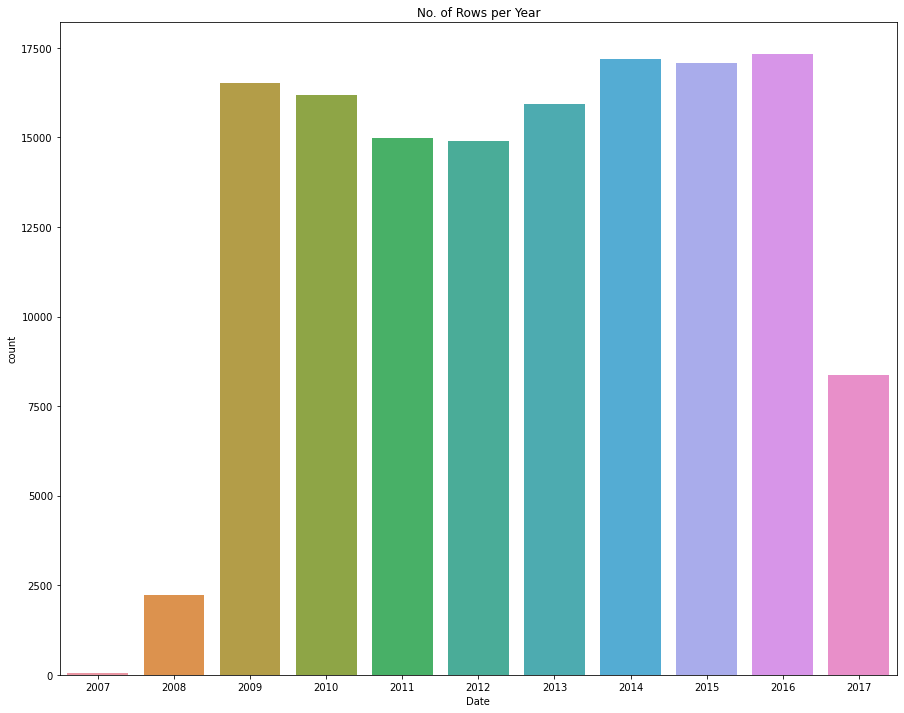

In [16]:
plt.figure(figsize=(15,12))
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

### Identifying Input and Target Columns

Not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

In [17]:
input_cols = df.columns[1:-1]
target_col = 'RainTomorrow'

In [18]:
input_cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [20]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [21]:
categorical_cols=categorical_cols[1:-1]

In [22]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [23]:
df[target_col]

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 140787, dtype: object

### Imputing Missing Numeric Data
Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [26]:
df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [27]:
df[numeric_cols]=imputer.fit_transform(df[numeric_cols])

In [28]:
df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [29]:
df['RainTomorrow']=df[target_col]

### Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

In [30]:
df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [31]:
from sklearn.preprocessing import OneHotEncoder
# ?OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [32]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [33]:
print(encoder.categories_)

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object), array(['E', 'ENE'

In [34]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [35]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [36]:
df['RainTomorrow']=df[target_col]

In [37]:
df2=df[['Date']+numeric_cols+encoded_cols+['RainTomorrow']]

In [38]:
df2['RainTomorrow'] = df2['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [39]:
df2.isna().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
RainTomorrow      0
Length: 120, dtype: int64

 ### Training, Validation and Test Sets

While working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

In [40]:
year = pd.to_datetime(df.Date).dt.year
df2_train = df2[year < 2015]
df2_val = df2[year == 2015]
df2_test = df2[year > 2015]

In [41]:
print('train_df.shape :', df2_train.shape)
print('val_df.shape :', df2_val.shape)
print('test_df.shape :', df2_test.shape)

train_df.shape : (97988, 120)
val_df.shape : (17089, 120)
test_df.shape : (25710, 120)


In [42]:
df2_train.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,2008-12-02,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,2008-12-03,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,2008-12-04,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,2008-12-05,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [43]:
df2_val.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainTomorrow
2133,2015-01-01,11.4,33.5,0.0,4.8,8.5,30.0,7.0,11.0,45.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2134,2015-01-02,15.5,39.6,0.0,4.8,8.5,56.0,9.0,9.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2135,2015-01-03,17.1,38.3,0.0,4.8,8.5,48.0,20.0,20.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2136,2015-01-04,26.0,33.1,0.0,4.8,8.5,41.0,7.0,7.0,46.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2137,2015-01-05,19.0,35.2,0.0,4.8,8.5,33.0,7.0,9.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [44]:
df2_test.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainTomorrow
2498,2016-01-01,20.4,37.6,0.0,4.8,8.5,54.0,0.0,7.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2499,2016-01-02,20.9,33.6,0.4,4.8,8.5,50.0,9.0,17.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2500,2016-01-03,18.4,23.1,2.2,4.8,8.5,48.0,11.0,39.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2501,2016-01-04,17.3,23.7,15.6,4.8,8.5,39.0,9.0,17.0,74.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2502,2016-01-05,15.5,22.9,6.8,4.8,8.5,31.0,6.0,9.0,92.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


### Scaling Numeric Features

lets scale numeric features to a small range of values e.g. (0,1)or (-1,1).

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
df2_train[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,4.8,8.5,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,5.0,5.0,23.7,31.8
144549,15.1,36.8,0.0,4.8,8.5,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,5.0,5.0,28.9,34.8
144550,17.3,37.8,0.0,4.8,8.5,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,5.0,5.0,29.7,35.7
144551,20.1,38.5,0.0,4.8,8.5,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,5.0,5.0,29.8,37.2


In [48]:
df2_train[numeric_cols]=scaler.fit_transform(df2_train[numeric_cols])

In [49]:
df2_train

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainTomorrow
0,2008-12-01,0.516509,0.517241,0.001617,0.058252,0.594406,0.294574,0.229885,0.275862,0.71,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,2008-12-02,0.375000,0.559387,0.000000,0.058252,0.594406,0.294574,0.045977,0.252874,0.44,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,2008-12-03,0.504717,0.570881,0.000000,0.058252,0.594406,0.310078,0.218391,0.298851,0.38,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,2008-12-04,0.417453,0.614943,0.000000,0.058252,0.594406,0.139535,0.126437,0.103448,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,2008-12-05,0.613208,0.697318,0.002695,0.058252,0.594406,0.271318,0.080460,0.229885,0.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,0.599057,0.714559,0.000000,0.058252,0.594406,0.286822,0.275862,0.298851,0.22,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
144549,2014-12-28,0.556604,0.783525,0.000000,0.058252,0.594406,0.193798,0.218391,0.229885,0.16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
144550,2014-12-29,0.608491,0.802682,0.000000,0.058252,0.594406,0.255814,0.298851,0.103448,0.15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
144551,2014-12-30,0.674528,0.816092,0.000000,0.058252,0.594406,0.286822,0.321839,0.195402,0.22,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [50]:
df2_val[numeric_cols]= scaler.transform(df2_val[numeric_cols])
df2_test[numeric_cols] = scaler.transform(df2_test[numeric_cols])

In [51]:
X_train=df2_train[numeric_cols+encoded_cols]
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.516509,0.517241,0.001617,0.058252,0.594406,0.294574,0.229885,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.375000,0.559387,0.000000,0.058252,0.594406,0.294574,0.045977,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.504717,0.570881,0.000000,0.058252,0.594406,0.310078,0.218391,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.417453,0.614943,0.000000,0.058252,0.594406,0.139535,0.126437,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.697318,0.002695,0.058252,0.594406,0.271318,0.080460,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
y_train=df2_train[target_col]

In [53]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
144548    0
144549    0
144550    0
144551    0
144552    0
Name: RainTomorrow, Length: 97988, dtype: int64

In [54]:
X_val=df2_val[numeric_cols+encoded_cols]
y_val=df2_val[target_col]
X_test=df2_test[numeric_cols+encoded_cols]
y_test=df2_test[target_col]

## Now we can apply the machine learning algorithms 

In [55]:
## Import Logistic regression and SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model1=LogisticRegression()

In [57]:
model2=SVC(kernel='rbf') 

In [58]:
model3=DecisionTreeClassifier()

In [59]:
model4=RandomForestClassifier()

In [60]:
model5=XGBClassifier()

In [61]:
model6 = KNeighborsClassifier()

In [62]:
model7=AdaBoostClassifier()

In [63]:
model8=XGBRFClassifier()

In [64]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    print(confusion_matrix(y_val, preds))
    accuracy = round(accuracy_score(y_val, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [65]:
def score_featureimp(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    print(confusion_matrix(y_val, preds))
#     plot_confusion_matrix(y_val,preds)  
#     plt.show()
    accuracy = round(accuracy_score(y_val, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')
    importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
      }).sort_values('importance', ascending=False)
    plt.title('Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='feature');
    plt.show()

In [66]:
score(model1,"LogisticRegression")

[[12955   556]
 [ 1943  1635]]
Accuracy for LogisticRegression : 0.85377 



In [67]:
models=[model3,model4,model5,model7,model8]

[[11759  1752]
 [ 1764  1814]]
Accuracy for DecisionTreeClassifier() : 0.79425 



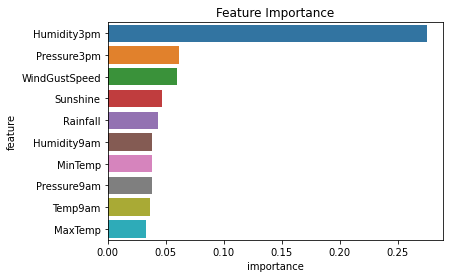

[[13072   439]
 [ 1998  1580]]
Accuracy for RandomForestClassifier() : 0.85739 



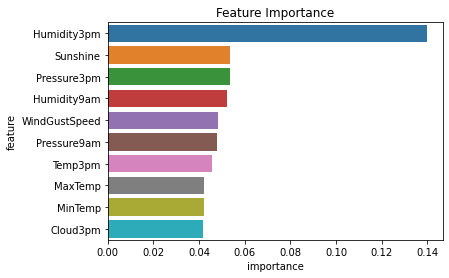

[[13001   510]
 [ 2001  1577]]
Accuracy for XGBClassifier() : 0.85306 



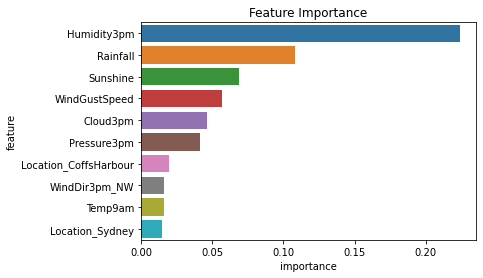

[[12930   581]
 [ 1993  1585]]
Accuracy for AdaBoostClassifier() : 0.84938 



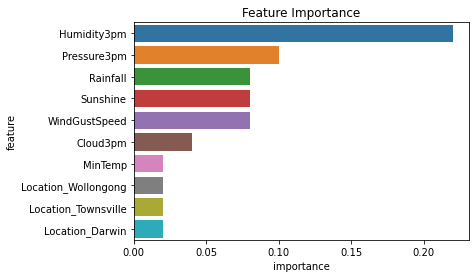

[[13008   503]
 [ 2301  1277]]
Accuracy for XGBRFClassifier() : 0.83592 



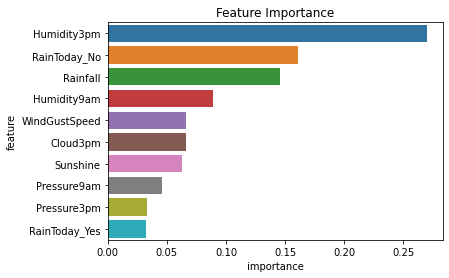

In [68]:
for model in models:
    score_featureimp(model,str(model))

In [69]:
score(model6)

[[12739   772]
 [ 2252  1326]]
Accuracy for Default : 0.82304 



## Among all the models we can see that XGBoostClassifier gave the best results on validation data
>Lets tune its hyperparameters to further increase its accuracy.
>we will tune parameters like 
- `n_estimators`(The number of trees to be created. More trees = greater capacity of the model)

- `max_depth`(As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.)
- `learning_rate` (The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.)

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [70]:
def test_params(**params):
    model = XGBClassifier(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, y_train)
    preds=model.predict(X_val)
    accuracy = round(accuracy_score(y_val, preds), 5)
    print('Accuracy :', accuracy, '\n')
    plot_confusion_matrix( model,X_val, y_val)  
    plt.show()

Accuracy : 0.85535 



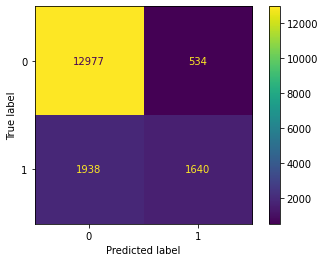

In [73]:
test_params(n_estimators=200, learning_rate=0.1)

Accuracy : 0.85558 



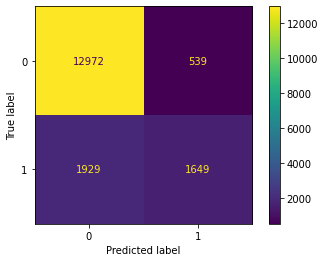

In [74]:
test_params(n_estimators=200, learning_rate=0.12)

Accuracy : 0.86178 



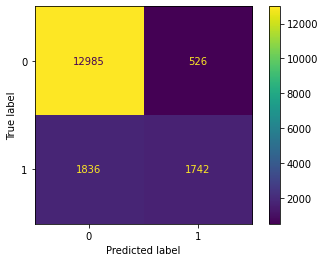

In [75]:
test_params(n_estimators=500, learning_rate=0.12)

Accuracy : 0.86213 



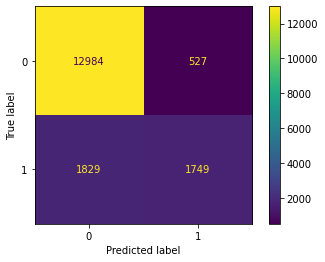

CPU times: user 2min 13s, sys: 125 ms, total: 2min 13s
Wall time: 2min 13s


In [76]:
%%time
test_params(n_estimators=550, learning_rate=0.12)

Accuracy : 0.86254 



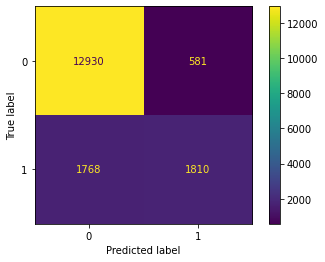

CPU times: user 3min 7s, sys: 197 ms, total: 3min 8s
Wall time: 3min 7s


In [77]:
%%time
test_params(n_estimators=500, learning_rate=0.12,max_depth=5)

Accuracy : 0.86225 



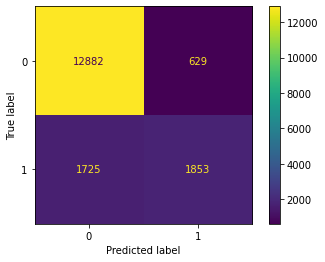

CPU times: user 5min 4s, sys: 339 ms, total: 5min 5s
Wall time: 5min 3s


In [78]:
%%time
test_params(n_estimators=500, learning_rate=0.12,max_depth=8)

Accuracy : 0.86102 



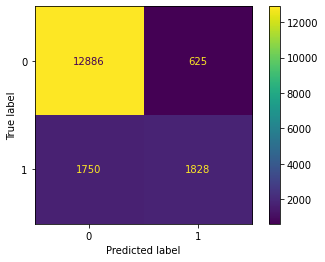

CPU times: user 6min 32s, sys: 409 ms, total: 6min 32s
Wall time: 6min 30s


In [79]:
%%time
test_params(n_estimators=500, learning_rate=0.12,max_depth=10)

Accuracy : 0.86149 



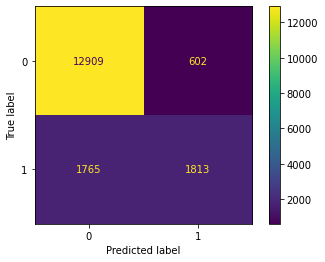

CPU times: user 10min 39s, sys: 702 ms, total: 10min 40s
Wall time: 10min 37s


In [80]:
%%time
test_params(n_estimators=500, learning_rate=0.12,max_depth=15)

Accuracy : 0.86178 



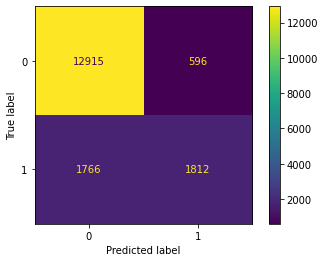

CPU times: user 19min 4s, sys: 1.17 s, total: 19min 5s
Wall time: 19min


In [81]:
%%time
test_params(n_estimators=500, learning_rate=0.12,max_depth=25)

Accuracy : 0.86301 



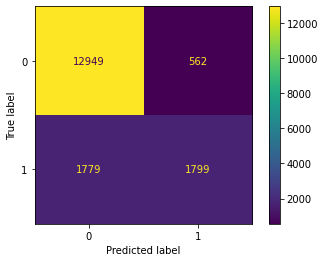

CPU times: user 2min 30s, sys: 151 ms, total: 2min 30s
Wall time: 2min 30s


In [82]:
%%time
test_params(n_estimators=500, learning_rate=0.12,max_depth=4)

Accuracy : 0.86377 



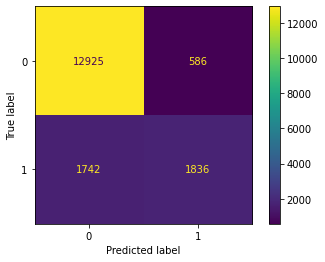

CPU times: user 13min 27s, sys: 869 ms, total: 13min 27s
Wall time: 13min 24s


In [83]:
%%time
test_params(learning_rate= 0.11, max_depth= 18, n_estimators= 500)

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
params_grid={'n_estimators': [100,500],'learning_rate':[0.11,0.12],'max_depth':[4,20]}

In [84]:
gs=GridSearchCV(estimator=XGBClassifier(n_jobs=-1, random_state=42),
             param_grid=params_grid )

In [85]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(n_jobs=-1, random_state=42),
             param_grid={'learning_rate': [0.11, 0.12], 'max_depth': [4, 20],
                         'n_estimators': [100, 500]})

In [86]:
gs.best_params_

{'learning_rate': 0.12, 'max_depth': 20, 'n_estimators': 500}

### So lets fit our model with best params and train the final model 


## Model Evaluation

Accuracy on validation : 0.86284 



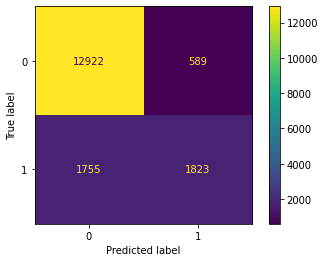

In [87]:
model = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=500,max_depth=20,learning_rate=0.12)
model.fit(X_train, y_train)
preds=model.predict(X_val)
accuracy = round(accuracy_score(y_val, preds), 5)
print('Accuracy on validation :', accuracy, '\n')
plot_confusion_matrix( model,X_val, y_val)  
plt.show()

In [88]:
accuracy_test = round(accuracy_score(y_test,model.predict(X_test)), 5)
print('Accuracy on test data :', accuracy_test, '\n')

Accuracy on test data : 0.85173 



In [89]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     19885
           1       0.74      0.54      0.62      5825

    accuracy                           0.85     25710
   macro avg       0.81      0.74      0.77     25710
weighted avg       0.84      0.85      0.84     25710



In [90]:
#the dataset is imbalanced so accuracy wil be the best metric

In [91]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8756297552126443

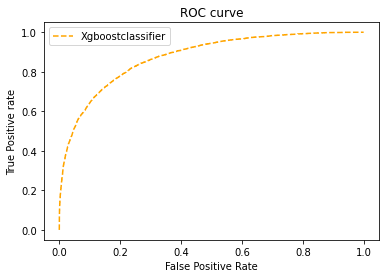

In [92]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Xgboostclassifier')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [93]:
from xgboost.sklearn import XGBModel
from xgboost import plot_tree


trees = model.get_booster().get_dump()

In [94]:
# print(trees[0])

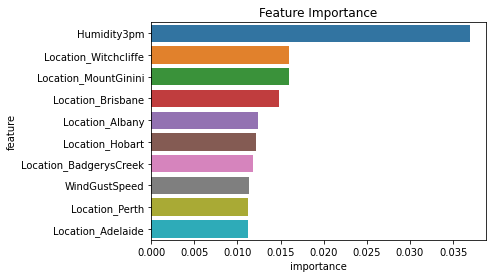

In [95]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
      }).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
plt.show()

## Now let's save our model 
- We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [96]:
import joblib

In [97]:
rain_aus_model={'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [98]:
joblib.dump(rain_aus_model, 'rain_aus.joblib')

['rain_aus.joblib']

In [99]:
#Now lets predict test accuracy by loading the model
testpreds= rain_aus_model['model'].predict(X_test)
accuracy_score(y_test, testpreds)

0.8517308440295605

### Summary and references 
- Downloading a real-world dataset
- Preprocessing the data 
- Exploratory data analysis
- One hot encoding of categorical data 
- Scaling the numeric columns
- Training the XGBoostClassifier model
- Hyperparameter tuning
- Using GridSearchCV for getting the best parameters
- Model evaluation and saving the model.
>References
- `Confusion Matrix` : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- `XBoost` : https://xgboost.readthedocs.io/en/stable/
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- `GridSearchCV` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html